In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
import seaborn as sns
import plotly.express as px

In [3]:
df_1T = query_table(table='vacuum_pump_1_10T')

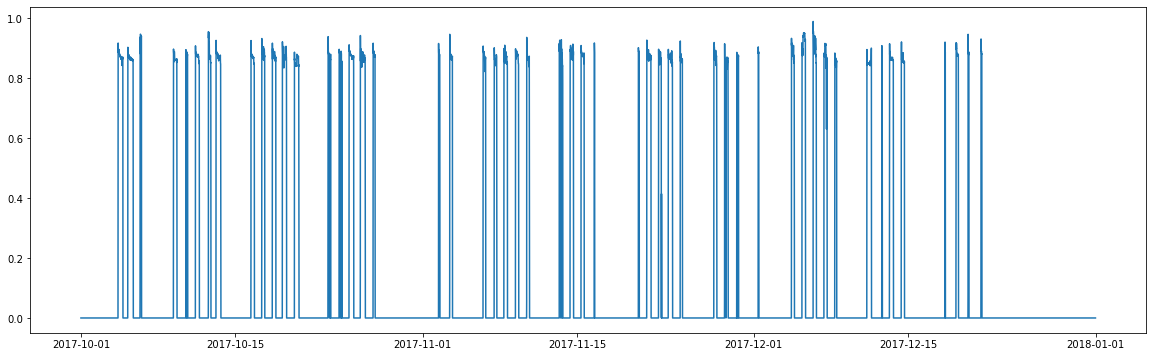

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(df_1T.index, df_1T.kw)
plt.show()

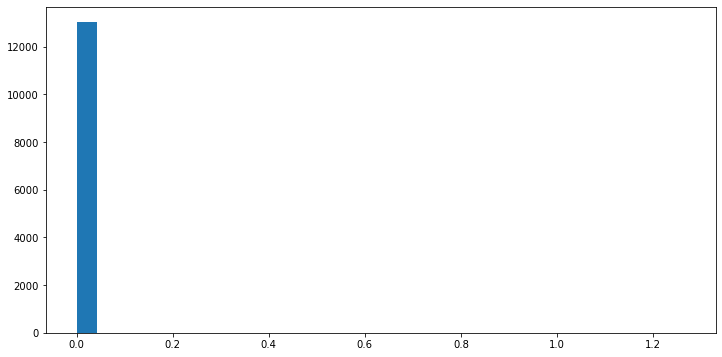

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()